In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
from datetime import datetime, timedelta

In [3]:
tickers = []
for ticker in ['aapl']:
    tickers.append(yf.Ticker(ticker)) 
    
appl = tickers[0].history(period = "1y", interval = "1d")

In [5]:
appl = appl.drop(columns = ['Dividends','Stock Splits'])
new_names = {'Date':'date','Open':'open','High':'high','Low':'low','Close':'close','Volume':'volume'}
appl.rename(columns = new_names, inplace = True)

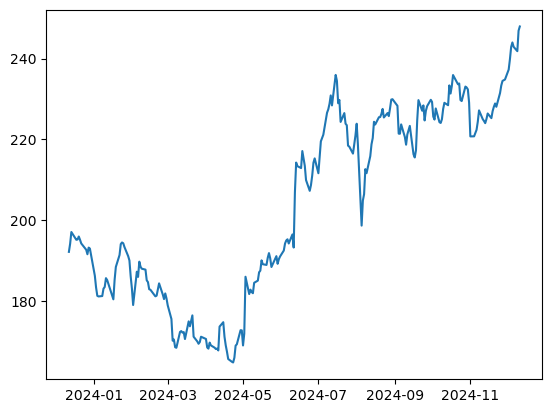

In [7]:
plt.plot(appl['open'])

In [9]:
yearly_yield = (appl['close'].iloc[-1]/appl['open'].iloc[0])**(252/len(appl)) - 1
appl['daily_return'] = (appl['close']/appl['open']) - 1
std = appl['daily_return'].std()
print('standard deviation of daily returns: ' + str(std))
print('annual return: ' + str(yearly_yield))
sharpe = (yearly_yield - 0.04)/(std*np.sqrt(252))
print('Sharpe: ' + str(sharpe))

standard deviation of daily returns: 0.011438630874197518
annual return: 0.28287527273577995
Sharpe: 1.3375467961179335


In [11]:
def sharpe(stock,start_date,end_date):
    
    ticker = yf.download(stock, start=start_date, end=end_date)
    
    new_names = {'Date':'date','Open':'open','High':'high','Low':'low','Close':'close','Volume':'volume'}
    ticker.rename(columns = new_names, inplace = True)

    # (final_close - first_open)^(252/number of days) - 1 transforms given return to annual scale
    yearly_yield = (ticker['close'].iloc[-1]/ticker['open'].iloc[0])**(252/len(ticker)) - 1
    
    ticker['daily_return'] = ticker['close'].pct_change()
    std = ticker['daily_return'].std()
    return (yearly_yield - 0.04)/(std*np.sqrt(252))

sharpe('AAPL','2024-01-01','2024-12-01')

[*********************100%***********************]  1 of 1 completed


1.1160845057769009

In [17]:
# Fetch the list of S&P 500 tickers
sp500_tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]['Symbol'].tolist()

# Initialize an empty list to store market cap data
market_caps = []

# Fetch market cap for each ticker
for ticker in sp500_tickers:
    stock = yf.Ticker(ticker)
    market_cap = stock.info.get('marketCap', 'N/A')
    market_caps.append({'Ticker': ticker, 'Market Cap': market_cap})

# Create a DataFrame
df = pd.DataFrame(market_caps)

# Display the DataFrame
print(df)

    Ticker    Market Cap
0      MMM   70667419648
1      AOS   10567235584
2      ABT  197971263488
3     ABBV  308136181760
4      ACN  227347611648
..     ...           ...
498    XYL   29974552576
499    YUM   38662631424
500   ZBRA   20847089664
501    ZBH   21283002368
502    ZTS   79932899328

[503 rows x 2 columns]


In [195]:
print(df[df['Ticker'] == 'INTC'])

def clean(df):
    indices = df[df['Market Cap'] == 'N/A'].index.tolist()
    indices.append(df[df['Ticker'] == 'INTC'].index[0])
    
    print(indices)
    df.drop(index=indices, inplace=True)

    new_index = []
    for i in range(len(df)):
        new_index.append(i)

    df = df.reset_index(drop=True)
    return df

df = clean(df)

    Ticker   Market Cap
249   INTC  86777561088
[249]


,Ticker,Market Cap
0,MMM,70667419648
1,AOS,10567235584
2,ABT,197971263488
3,ABBV,308136181760
4,ACN,227347611648
...,...,...
495,XYL,29974552576
496,YUM,38662631424
497,ZBRA,20847089664
498,ZBH,21283002368


In [197]:
df['Sharpe'] = df['Ticker'].apply(lambda x: sharpe(x, '2024-01-01', '2024-12-10'))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Text(0, 0.5, 'Sharpe ratio')

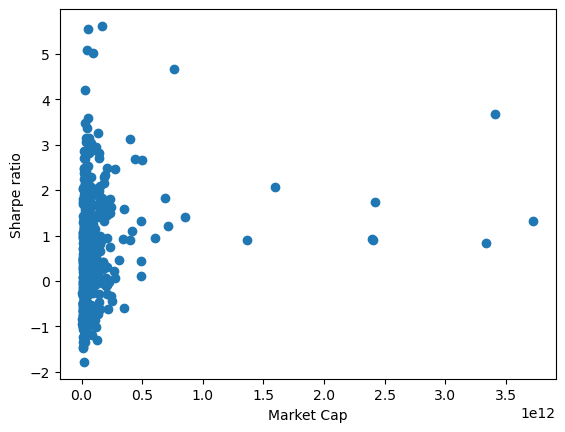

In [223]:
plt.scatter(df['Market Cap'], df['Sharpe'])
plt.xlabel('Market Cap')
plt.ylabel('Sharpe ratio')

Text(0, 0.5, 'Sharpe ratio')

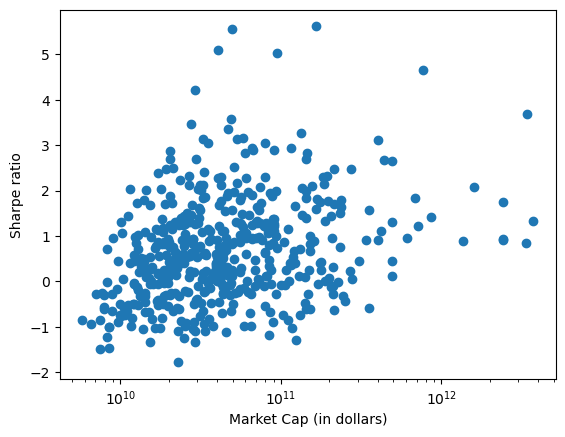

In [227]:
plt.scatter(df['Market Cap'], df['Sharpe'])
plt.xscale('log')
plt.xlabel('Market Cap (in dollars)')
plt.ylabel('Sharpe ratio')